In [127]:
#%% Load Modules
startup_file='init_python.py'
exec(open(startup_file).read())
from matplotlib.patches import Rectangle

In [128]:
# DEFINE PARAMETERS FROM SIMULATION 


N_ensemble=4    #number of ensembles created for freely evoling sumilations. Used for averaging data

file_start = 1  #define the start/end files for plotting
file_end = 200

dt = 0.5 * 1.e-3 #time between files (0.5 factor due to change in equation). Simulation time = dt * filenumber

#initial injection scale in k- and freq-space
kf = 512
wf = kf**2.0


L = 2.0*np.pi   #box size
N = 2048        #number of spatial grid points in data

#fluxes defined from initial forcing
wave_action_flux = 2.0 * 32.12
energy_flux = 2.0 * 8.41969e6

#fit regions for T/mu
kmin_low = 1
kmax_low = 8

#fit regions for T/\omega
kmin_high = 200
kmax_high = 400

c1 = 1.0


In [129]:
# DEFINE GIBBS FUNCTION
def Gibbs_function(x,a):
    return 1.0/( (x/a) + 1.0)

In [130]:
def convert_k_to_omega(k,n_k):

    n_omega = n_k[1:]/(2.0*k[1:]) 	# n_2d/2k = 1d sepctrum in freq space
    omega = k[1:]**2	
    
    return omega, n_omega

In [131]:
def estimate_mu_T(omega,n_omega):
    
	# normalisationValue = T/\mu
	#normalisationValue = np.max(n_omega[0:(3*kf//4)])				#Simon's computation of nomralisationValue =  maxValue
	normalisationValue = np.mean(n_omega[kmin_low:kmax_low])			#Alternative computation of nomralisationValue =  meanValue
	
	omega_fit = omega[0:2*kf//4]
	n_fit = n_omega[0:2*kf//4] / normalisationValue
		
	mu_est, pcov = curve_fit(Gibbs_function, omega_fit, n_fit)

	T = mu_est * normalisationValue
	mu = mu_est
    
	return mu, T

In [132]:
def selfsimilar_variables(omega,n_omega, mu, T):
    eta = omega / mu
    phi = (mu / T) * n_omega 

    return eta, phi

#def logcorrected_selfsimilar_variables(omega,n_omega, mu, T, eta_plus):
 #   eta = omega / mu
  #  phi = (mu / T) * n_omega 

   # return eta_prime, phi_prime

In [133]:
#DECALRE DATA ARRAYS FOR ANALYSIS

n_k = np.zeros(N)
temp = np.zeros(file_end-file_start+1)
mu =  np.zeros(file_end-file_start+1)
time = np.zeros(file_end-file_start+1)
eta_plus = np.zeros(file_end-file_start+1)


time_data = []
mu_data = []
T_data = []


In [134]:
def find_eta_plus(x, y):  # x = eta, y = eta * phi
    threshold = 0.1
    i = len(y)-1           # end index of y array
    val = y[i]              # record value. should be close to zero
    while val < threshold:
        i = i - 1           # go through array backwards
        val = y[i]
       
        if i==0:
            val=1
    return eta[i]                    # once value goes over threshold, return the value of eta at index

/tmp/ipykernel_7640/2314107335.py:61: RuntimeWarning: invalid value encountered in power
  axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))
/tmp/ipykernel_7640/2314107335.py:61: RuntimeWarning: invalid value encountered in power
  axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))
/tmp/ipykernel_7640/2314107335.py:61: RuntimeWarning: invalid value encountered in power
  axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))
/tmp/ipykernel_7640/2314107335.py:61: RuntimeWarning: invalid value encountered in power
  axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))
/tmp/ipykernel_7640/2314107335.py:61: RuntimeWarning: invalid value encountered in power
  axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgr

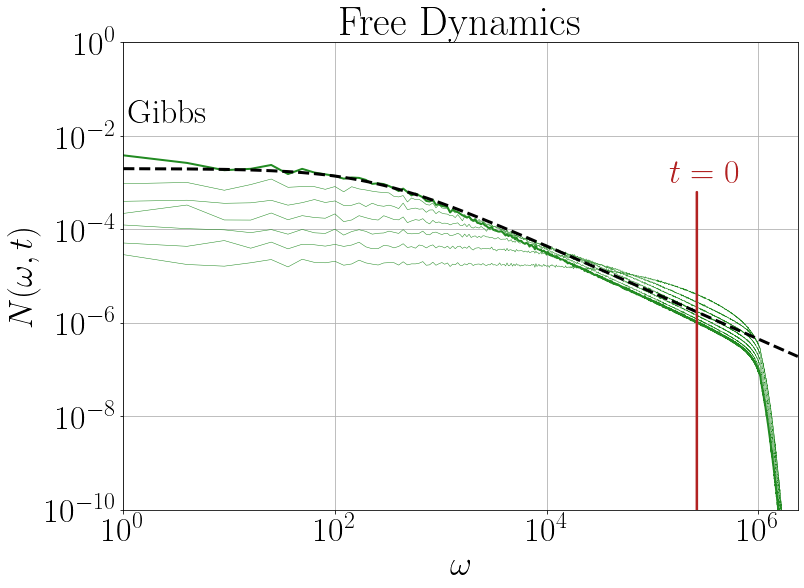

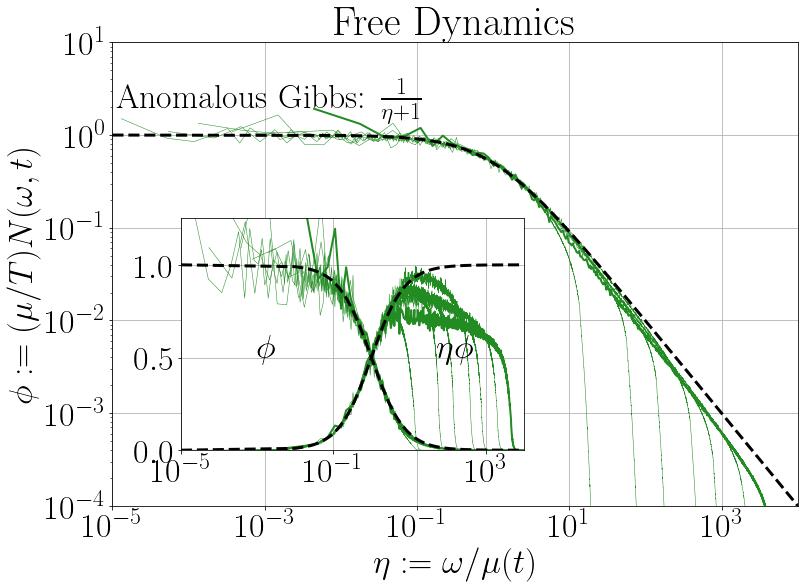

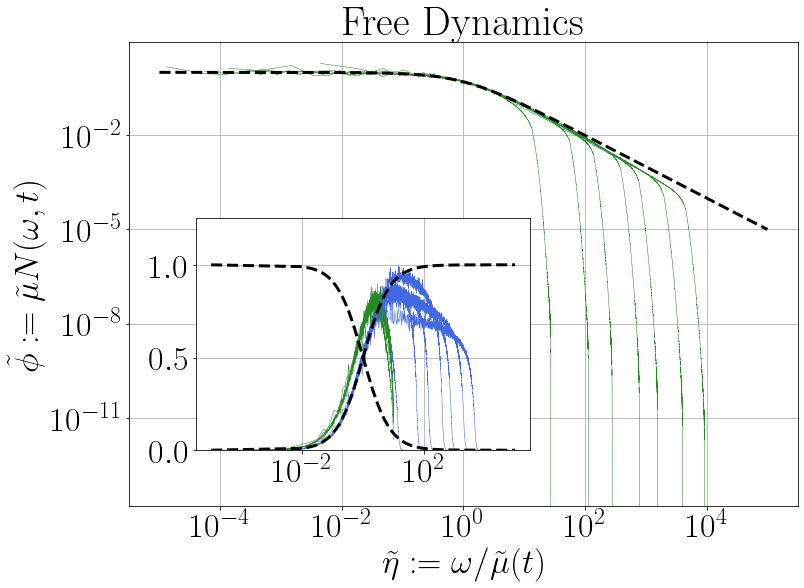

In [135]:
fig1, axs1 = newfig(1, 1)

fig2, axs2 = newfig(1, 1)
axs2a = axs2.inset_axes([0.1,0.12,0.5,0.5])#axs2,width="50%", height="45%", loc='lower left',borderpad=3)

fig3, axs3 = newfig(1,1)
axs3a = axs3.inset_axes([0.1,0.12,0.5,0.5])

index = 0


for file_num in range(file_start+25,file_end+1,25):	#loop over data, every 25 files

	time = file_num * dt		# define simulation time
	n_k = 0.0
	
	#average over ensembles
	for ensemble_num in range(1,N_ensemble,1):
		filename = '/data2/2d_gp_selfsimilar/decay_at_512_ensemble_%.1d/output/spectrum.%.5d' % (ensemble_num,file_num);
		data = np.loadtxt(filename)
		n_k += data[:,1]
        
	
	n_k /= N_ensemble   # this is the 2d spectrum  
	k = data[:,0]		



	omega, n_omega = convert_k_to_omega(k,n_k)


	if file_num == file_start:			# compute total energy and wave action from initial file
		total_wave_action = np.sum(n_k)
		total_energy = 0.5 * np.sum(k * k * n_k)


	mu, T = estimate_mu_T(omega, n_omega)

	time_data.append(time)
	mu_data.append(mu)
	T_data.append(T)

	

	eta, phi = selfsimilar_variables(omega,n_omega, mu, T)

	eta_plus = find_eta_plus(eta, eta*phi)

	#eta_prime, phi_prime = logcorrected_selfsimilar_variables(omega,n_omega, mu, T, eta_plus)
	

	axs1.plot(omega, n_omega, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))    						# plots the wave action spectrum (not rescaled)					
	
	axs2.plot(eta, phi, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))					# plots the re-scaled wave action spectrum
	axs2a.plot(eta, phi, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))					# plots the rescaled wave action spectrum in lin-log as insert
	axs2a.plot(eta, eta*phi, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))	# plots the rescaled wave action spectrum (compensated by omega) in lin-log as insert

	c1=20.0
	axs3.plot(eta, phi, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))					# plots the re-scaled wave action spectrum
	axs3a.plot(eta, eta*phi, linewidth=0.5,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))					# plots the rescaled wave action spectrum in lin-log as insert
	axs3a.plot(eta, eta*phi*np.log(c1 / eta)**0.33, linewidth=0.5,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))	
	


axs1.plot(omega, n_omega, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))										# plots the wave action spectrum (not rescaled)	

axs2.plot(eta, phi, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))							# plots the re-scaled wave action spectrum
axs2a.plot(eta, phi, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))							# plots the rescaled wave action spectrum in lin-log as insert
axs2a.plot(eta, eta*phi, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))				# plots the rescaled wave action spectrum (compensated by omega) in lin-log as insert
	

#axs3.plot(eta_prime, phi_prime, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))	
#axs3a.plot(eta_prime, (eta_prime/(np.log(1.0/eta_prime)**0.1))*phi_prime, linewidth=2,c='royalblue',label=r't=%.3f' % round(dt*file_num,4))							# plots the rescaled wave action spectrum in lin-log as insert
#axs3a.plot(eta_prime, eta_prime*phi_prime, linewidth=2,c='forestgreen',label=r't=%.3f' % round(dt*file_num,4))	


Gibbs = (T/mu) * 1.0 / (1.0 + eta)																							# define theoretical Gibbs solution
axs1.plot(omega[:], Gibbs[:],linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')									# plots the theoretical gibbs solution on wave action spectrum


initial=0.0*omega
initial[kf-2:kf+2]=0.0001*2*np.pi
axs1.plot(omega, initial, linewidth=2,c='firebrick')																			# plot the initial spectrum on wave action spectrum


axs1.annotate(text=r'Gibbs',xy=(1.1,2.e-2),c='k')
axs1.annotate(text='$t=0$',xy=(wf-120000,1e-3),c='firebrick')
axs1.grid()
axs1.set_xlabel(r'$\omega$')
axs1.set_ylabel(r'$N(\omega,t)$')
axs1.set_yscale('log')
axs1.set_xscale('log')
axs1.set_xlim(1,(1024*1.5)**2)
axs1.set_ylim(1.e-10,1.e0)
#axs1.legend(loc='best', ncol=2)
axs1.set_title('Free Dynamics')
fig1.tight_layout()

fig1.savefig('spectrum_decay.pdf')


##################################################################################################################
eta = np.arange(1.e-5,1.e5,0.01)
Gibbs_fit = 1.0 / (eta+1.0)
axs2.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axs2a.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axs2a.plot(eta, eta*Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')


axs2a.set_yscale('linear')
axs2a.set_xscale('log')
axs2a.set_xlim(1e-5,1e4)
axs2a.set_ylim(0,1.25)
axs2a.annotate(text=r'$\phi$',xy=(1.e-3,0.5),c='k')
axs2a.annotate(text=r'$\eta\phi$',xy=(5.e1,0.5),c='k')
axs2a.grid()

axs2.annotate(text=r'Anomalous Gibbs: $\frac{1}{\eta+1}$',xy=(1.1e-5,2.e0),c='k')
#axs2.annotate(text='$\leftarrow f_0$',xy=(wf,1e-4),c='firebrick')
axs2.grid()
axs2.set_xlabel(r'$\eta:=\omega/\mu(t)$')
axs2.set_ylabel(r'$\phi:=(\mu/T)N(\omega,t)$')
axs2.set_yscale('log')
axs2.set_xscale('log')
axs2.set_xlim(1e-5,1e4)
axs2.set_ylim(1.e-4,1.e1)
#axs1.legend(loc='best', ncol=2)

axs2.set_title('Free Dynamics')

fig2.tight_layout()

fig2.savefig('gibbs_decay.pdf')

######################################################################################


eta = np.arange(1.e-5,1.e5,0.01)
Gibbs_fit = 1.0 / (eta+1.0)
axs3.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axs3a.plot(eta, Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')
axs3a.plot(eta, eta*Gibbs_fit,linewidth=3,label=r'$Gibbs$', color='black', linestyle='--')


axs3a.set_yscale('linear')
axs3a.set_xscale('log')
#axs3a.set_xlim(1e-6,1e1)
axs3a.set_ylim(0,1.25)

axs3a.grid()


axs3.grid()
axs3.set_xlabel(r'$\tilde{\eta}:=\omega/\tilde{\mu}(t)$')
axs3.set_ylabel(r'$\tilde{\phi}:=\tilde{\mu}N(\omega,t)$')
axs3.set_yscale('log')
axs3.set_xscale('log')
#axs3.set_xlim(1e-6,1e1)
#axs4.set_ylim(1.e-4,1.e1)
#axs1.legend(loc='best', ncol=2)

axs3.set_title('Free Dynamics')

fig3.tight_layout()

fig3.savefig('gibbs_log_decay.pdf')
